# Plotting OpenFE DG results against experiment using Cinnabar v0.4

This notebook shows how one would go about creating a cinnabar plot of OpenFE results against known experimental values.

In [1]:
# First we do a set of imports
import csv
from pprint import pprint
from cinnabar import plotting as cinnabar_plotting
import numpy as np

In [2]:
def plot_dg(
    exp_data: dict[str, dict[str, float]],
    calc_data: dict[str, dict[str, float]],
    dg_filename: str,
    statistics: list = ["RMSE", "MUE", "R2", "rho"],
):
    shift = sum([i['dG'] for i in exp_data.values()]) / len(exp_data)
    x_data = np.asarray([i['dG'] for i in exp_data.values()])
    y_data = np.asarray([i['dG'] for i in calc_data.values()])
    xerr = np.asarray([i['ddG'] for i in exp_data.values()])
    yerr = np.asarray([i['ddG'] for i in calc_data.values()])
    
    # centralising
    # this should be replaced by providing one experimental result
    x_data = x_data - np.mean(x_data) + shift
    y_data = y_data - np.mean(y_data) + shift
    
    cinnabar_plotting._master_plot(
        x_data,
        y_data,
        xerr=xerr,
        yerr=yerr,
        origins=False,
        statistics=statistics,
        quantity=rf"$\Delta$ G",
        title='Experiment vs OpenFE',
        method_name="",
        target_name="",
        filename=dg_filename,
        bootstrap_x_uncertainty=False,
        bootstrap_y_uncertainty=False,
        statistic_type="mle",
        xy_lim=[-15, -5],
        figsize=5,
        xlabel='experimental',
        ylabel='openfe',
    )

## Loading experimental data

First we load our known experimental data from a tab separated values (TSV) file.

The format of the TSV file is as follows:

```
ligand  estimate (kcal/mol)     uncertainty (kcal/mol)
```

In [3]:
# read in the experimental data

experimental_data = {}
experimental_filename = 'assets/experimental.tsv'

with open(experimental_filename, 'r') as fd:
    rd = csv.reader(fd, delimiter="\t", quotechar='"')
    headers = next(rd)
    for row in rd:
        experimental_data[row[0]] = {}
        experimental_data[row[0]]['dG'] = float(row[1])
        experimental_data[row[0]]['ddG'] = float(row[2])

pprint(experimental_data)

{'lig_ejm_42': {'dG': -9.81, 'ddG': 0.18},
 'lig_ejm_43': {'dG': -8.29, 'ddG': 0.18},
 'lig_ejm_45': {'dG': -9.59, 'ddG': 0.18},
 'lig_ejm_46': {'dG': -11.35, 'ddG': 0.17},
 'lig_ejm_47': {'dG': -9.73, 'ddG': 0.18},
 'lig_ejm_48': {'dG': -9.03, 'ddG': 0.18},
 'lig_ejm_50': {'dG': -9.01, 'ddG': 0.18},
 'lig_ejm_54': {'dG': -10.57, 'ddG': 0.18},
 'lig_ejm_55': {'dG': -9.24, 'ddG': 0.18},
 'lig_jmc_23': {'dG': -11.74, 'ddG': 0.18},
 'lig_jmc_27': {'dG': -11.31, 'ddG': 0.17},
 'lig_jmc_28': {'dG': -11.01, 'ddG': 0.18}}


## Loading free energy results

Next we load in results from the TSV file created by `openfe gather --report dg`.

Please see the following tutorial for more information on how to run the gather command: https://github.com/OpenFreeEnergy/ExampleNotebooks/blob/main/rbfe_tutorial/cli_tutorial.md

**Important note:**
If there is no experimental binding free energy for a ligand, that ligand's calcuated data will be excluded from the plot.

In [4]:
# Read in calculated results

calc_data = {}
calculated_filename = 'assets/calc_dg.tsv'

with open(calculated_filename, 'r') as fd:
    rd = csv.reader(fd, delimiter="\t", quotechar='"')
    headers = next(rd)
    for row in rd:
        # Only add ligand to dict if it has an exp. value
        if row[0] in experimental_data:
            calc_data[row[0]] = {}
            calc_data[row[0]]['dG'] = float(row[1])
            calc_data[row[0]]['ddG'] = float(row[2])

pprint(calc_data)

{'lig_ejm_42': {'dG': 0.7, 'ddG': 0.1},
 'lig_ejm_43': {'dG': 2.0, 'ddG': 0.2},
 'lig_ejm_46': {'dG': -0.98, 'ddG': 0.05},
 'lig_ejm_47': {'dG': -0.1, 'ddG': 0.1},
 'lig_ejm_48': {'dG': 0.53, 'ddG': 0.09},
 'lig_ejm_50': {'dG': 0.91, 'ddG': 0.06},
 'lig_jmc_23': {'dG': -0.68, 'ddG': 0.09},
 'lig_jmc_27': {'dG': -1.1, 'ddG': 0.1},
 'lig_jmc_28': {'dG': -1.25, 'ddG': 0.08}}


In [5]:
# Bring exp data in same order as calc data
sorted_exp_data = {k: experimental_data[k] for k in calc_data}

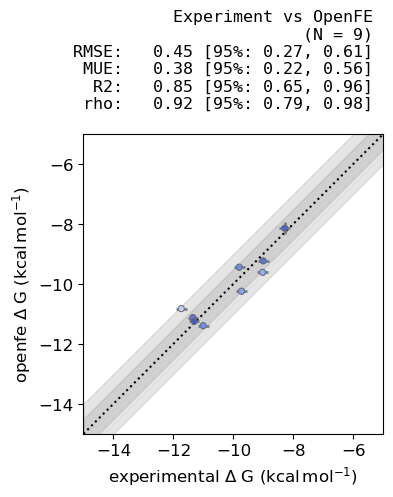

In [6]:
plot_dg(sorted_exp_data, calc_data, 'dg.png')